<a href="https://colab.research.google.com/github/soulsharp/Powerball_Sim/blob/main/Powerball_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

Detailed Rules PowerBall lottery : https://nclottery.com/Content/Docs/2.04A%20Powerball%20Game%20Rules.pdf

Rules in Brief:

1) You select the no of tickets you want to buy each drawing of numbers(156 drawings per year)

2) Each ticket costs $2

3) You pick/get 5 random numbers between 1 and 69 on a white ball(for this simulation, the numbers are randomly chosen) and one power ball number between 1 and 26.

4) If one or more of your drawings(including the powerball) match with the winning drawing for that round the reward amounts are credited as follows:


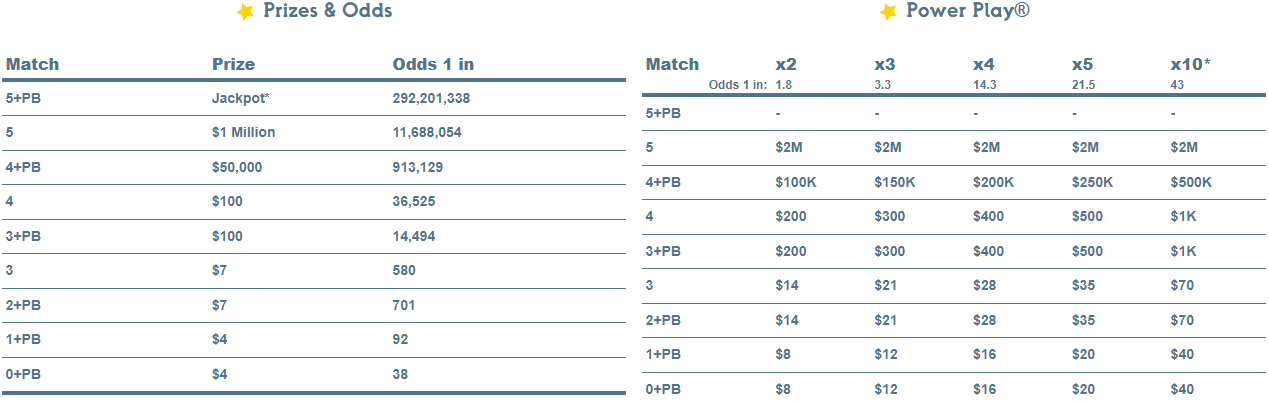

5) There is an additional feature to add "Power Play" to the ticket for $1 which boosts the winning amount by a multiplier selected from the distribution mentioned below the respective multipliers in each figure at the beginning of a round.

In [ ]:
# a helper function to simulate a single draw

def draw_balls():
  balls_drawn = []
  winning_balls =[]
  for i in range(5):
    balls_drawn.append(random.choice(range(1, 70)))
    winning_balls.append(random.choice(range(1, 70)))
  balls_drawn.append(random.choice(range(1, 27)))
  winning_balls.append(random.choice(range(1, 27)))

  return balls_drawn, winning_balls

print(draw_balls())


([4, 28, 46, 44, 18, 19], [27, 41, 29, 18, 20, 2])


In [ ]:
# helper function to get matches in a single draw

# returns a dictionary with number of matches excluding the powerball and a boolean value for powerball_match
def balls_matched(balls_drawn, winning_balls):
  flag = False
  num_matches = len(set(balls_drawn[:4]).intersection(set(winning_balls[:4])))
  if balls_drawn[5] == winning_balls[5]:
    flag = True

  return num_matches, flag

balls_drawn, winning_balls = draw_balls()
print(balls_matched(balls_drawn, winning_balls))

(1, False)


In [ ]:
# creates a lookup table for the winnings
def winnings_lookup_table():
  lookup_table = {}

  # entering values from the table shown earlier
  # jackpot amount fixed at 20 mill USD
  lookup_table[(5, True)] = 20000000
  lookup_table[(5, False)] = 1000000
  lookup_table[(4, True)] = 50000
  lookup_table[(4, False)] = 100
  lookup_table[(3, True)] = 100
  lookup_table[(3, False)] = 7
  lookup_table[(2, True)] = 7
  lookup_table[(2, False)] = 0
  lookup_table[(1, True)] = 4
  lookup_table[(1, False)] = 0
  lookup_table[(0, True)] = 4
  lookup_table[(0, False)] = 0

  return lookup_table

winnings_lookup_table()

{(5, True): 20000000,
 (5, False): 1000000,
 (4, True): 50000,
 (4, False): 100,
 (3, True): 100,
 (3, False): 7,
 (2, True): 7,
 (2, False): 0,
 (1, True): 4,
 (1, False): 0,
 (0, True): 4,
 (0, False): 0}

In [ ]:
# The probability density function of picking a powerplay multiplier is shown in the table above
def get_multiplier():
  # a multipier is picked once every draw based on the pdf
  odds = [1/43, 1/21.5, 1/14.3, 1/3.3, 1/1.8]
  cdf = [0]
  for i in range(5):
    cdf.append(cdf[i] + odds[i])
  cdf = cdf[1:]

  # picking multipliers based on a pdf
  random_number = random.random()
  if random_number < cdf[0]:
    multiplier = 10
  elif random_number < cdf[1]:
    multiplier = 5
  elif random_number < cdf[2]:
    multiplier = 4
  elif random_number < cdf[3]:
    multiplier = 3
  else:
    multiplier = 2

  return multiplier

for i in range(9):
  print(get_multiplier())


2
4
3
4
3
3
3
3
2


In [ ]:
# helper function to get winnings in a draw:

# Takes in num_matches, boolean value corresponding to a powerball match and returns winnings for a draw
def winnings(num_matches, powerball_flag, powerplay_flag=False, winnings_table=winnings_lookup_table()):
  winning_amount = winnings_table.get((num_matches, powerball_flag), "Not found")

  multiplier = 1
  # powerplay logic to determine the multiplier on the winning amount
  if powerplay_flag == True and num_matches == 5 and powerball_flag == True:
    multiplier = 1
  elif powerplay_flag == True and num_matches == 5 and powerball_flag == False:
    multiplier = 2
  elif powerplay_flag == True:
    multiplier = get_multiplier()

  return multiplier * winning_amount

print(winnings(5, False, False))
winnings(5, False, True)

1000000


2000000

Strategy 1:

Here the balls(including the powerball are drawn at random)

In [ ]:
# Lets simulate n rounds of draws and see total winnings and spendings
def simulating_n_rounds(num_of_rounds):
  amt_spent = 0
  win_amt = 0

  # lookup table to check what category wins the most
  lookup_table = {}

  lookup_table[(5, True)] = 0
  lookup_table[(5, False)] = 0
  lookup_table[(4, True)] = 0
  lookup_table[(4, False)] = 0
  lookup_table[(3, True)] = 0
  lookup_table[(3, False)] = 0
  lookup_table[(2, True)] = 0
  lookup_table[(2, False)] = 0
  lookup_table[(1, True)] = 0
  lookup_table[(1, False)] = 0
  lookup_table[(0, True)] = 0
  lookup_table[(0, False)] = 0


  for i in range(num_of_rounds):
    amt_spent += 2
    bdrawn, wballs = draw_balls()
    num_matched, powerball_flag = balls_matched(bdrawn,wballs)
    lookup_table[(num_matched, powerball_flag)] += 1
    powerplay_flag = random.choice([True, False])
    if powerplay_flag == True:
      amt_spent += 1
    win_amt += winnings(num_matched, powerball_flag, powerplay_flag)

  return win_amt, amt_spent, lookup_table

total_win, total_spent, lookup_table  = simulating_n_rounds(100000)
print(f" Total amount won = {total_win} \n Total amount spent = {total_spent}")
print("No of wins in each category:", lookup_table)


 Total amount won = 30165 
 Total amount spent = 250057
No of wins in each category: {(5, True): 0, (5, False): 0, (4, True): 0, (4, False): 0, (3, True): 0, (3, False): 26, (2, True): 53, (2, False): 1289, (1, True): 729, (1, False): 18768, (0, True): 3079, (0, False): 76056}


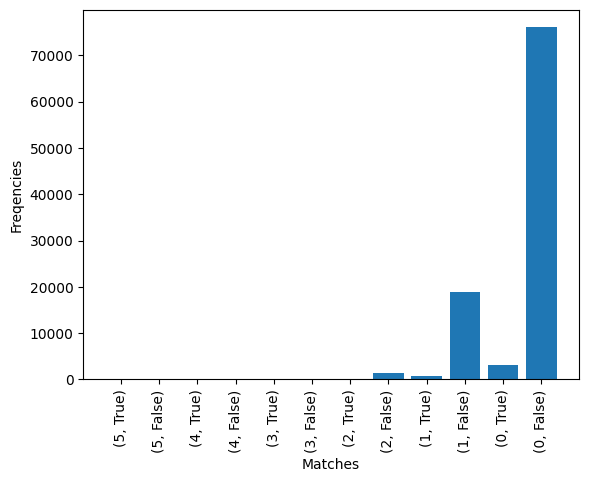

In [ ]:
# Plots frequency of winnings alongside their respective labels
keys = lookup_table.keys()
values = lookup_table.values()
x_labels = [str(key) for key in keys]
plt.bar(x_labels, values)
plt.xticks(rotation=90)
plt.xlabel("Matches")
plt.ylabel("Freqencies")
plt.show()


Strategy 2:

Say you believe in lucky nos and pick only a certain combination for all 100000 rounds.Are you expected to perform better or worse than Strategy 1?

In [ ]:
# Lets simulate n rounds of draws and see total winnings and spendings
def rounds_with_same_numbers(num_of_rounds, lucky_numbers):
  amt_spent = 0
  win_amt = 0

  # lookup table to check what category wins the most
  lookup_table = {}

  lookup_table[(5, True)] = 0
  lookup_table[(5, False)] = 0
  lookup_table[(4, True)] = 0
  lookup_table[(4, False)] = 0
  lookup_table[(3, True)] = 0
  lookup_table[(3, False)] = 0
  lookup_table[(2, True)] = 0
  lookup_table[(2, False)] = 0
  lookup_table[(1, True)] = 0
  lookup_table[(1, False)] = 0
  lookup_table[(0, True)] = 0
  lookup_table[(0, False)] = 0


  for i in range(num_of_rounds):
    amt_spent += 2
    _, wballs = draw_balls()
    bdrawn = [1, 4, 58, 37, 11, 25]
    num_matched, powerball_flag = balls_matched(bdrawn,wballs)
    lookup_table[(num_matched, powerball_flag)] += 1
    powerplay_flag = random.choice([True, False])
    if powerplay_flag:
      amt_spent += 1
    win_amt += winnings(num_matched, powerball_flag, powerplay_flag)

  return win_amt, amt_spent, lookup_table

total_win, total_spent, lookup_table  = simulating_n_rounds(100000)
print(f" Total amount won = {total_win} \n Total amount spent = {total_spent}")
print("No of wins in each category:", lookup_table)

 Total amount won = 30296 
 Total amount spent = 250154
No of wins in each category: {(5, True): 0, (5, False): 0, (4, True): 0, (4, False): 0, (3, True): 2, (3, False): 21, (2, True): 47, (2, False): 1281, (1, True): 786, (1, False): 18935, (0, True): 3119, (0, False): 75809}


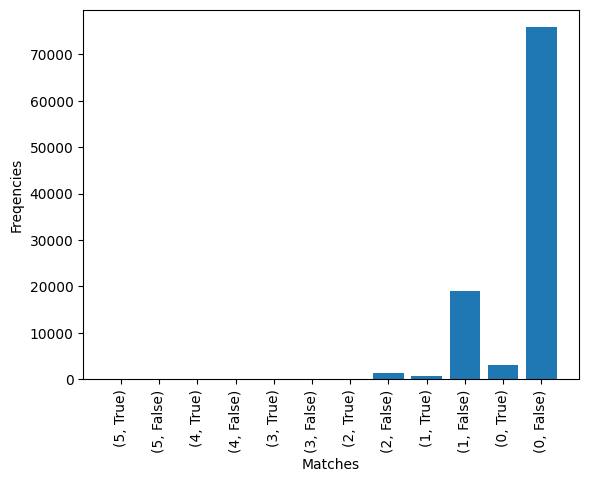

In [ ]:
# Plots frequency of winnings alongside their respective labels
keys = lookup_table.keys()
values = lookup_table.values()
x_labels = [str(key) for key in keys]
plt.bar(x_labels, values)
plt.xticks(rotation=90)
plt.xlabel("Matches")
plt.ylabel("Freqencies")
plt.show()


In a bunch of trials, the amount won to amount spent ratio seems almost the same. The histograms of matches also look nearly identical.

Strategy 1 and 2 seem to perform equally well. It seems that for other strategies , ie fixing x balls and choosing 6-x balls at random, the histograms and amount won to spent ratio are identical.
This is not surprising considering that the probabilities of successes do not change in any strategy